In [1]:
import pennylane as qml
from pennylane import numpy as np

from print_latex import print_state_vector

Les portes quantiques peuvent être effectuées en séquence ou en parallèles. Le nombre de couches dans un circuit défini sa profondeur. Cette profondeur constitue un obstacle majeur dans l'ère NISQ puisque les erreurs s'accumulent à chaque étape du circuit. Pour obtenir un résultat fiable, il est essentiel de limiter la profondeur du circuit. 

EXERCICE

---

En notation Dirac, montrez que la porte $Z$ et la séquence de portes $HXH$ sont équivalentes. Soit que
$$Z\vert 0 \rangle = HXH|0 \rangle$$
$$Z\vert 1 \rangle = HXH|1 \rangle$$

Ensuite, complétez les circuits ci-dessous pour montrez que la porte $Z$ et la séquence de portes $HXH$ donnent le même état final. 

In [7]:
dev = qml.device("default.qubit", wires = 2)
@qml.qnode(dev)
def Z_gate():
    qml.RX(np.pi/2, wires = 0)
    #####YOUR CODE HERE#####
    return qml.state()

@qml.qnode(dev)
def HXH_gate():
    qml.RX(np.pi/2, wires = 0)
    #####YOUR CODE HERE#####
    return qml.state()

In [8]:
#print_state_vector(Z_gate())
#print_state_vector(HXH_gate())

EXERCICE

---

Considérez le circuit ci-dessous, quelle est sa profondeur?

In [15]:
n_qubits = 8
dev = qml.device('default.qubit', wires = n_qubits)
@qml.qnode(dev)
def circuit(n_qubits):
    qml.Hadamard(wires = 0)
    for i in range(n_qubits-1):
        qml.CNOT([i,i+1])
    return qml.state()

In [16]:
print_state_vector(circuit(n_qubits))

$$\left|\psi\right\rangle = (0.707107) \left|{00000000}\right\rangle + (0.707107) \left|{11111111}\right\rangle$$

(<Figure size 1100x900 with 1 Axes>, <Axes: >)

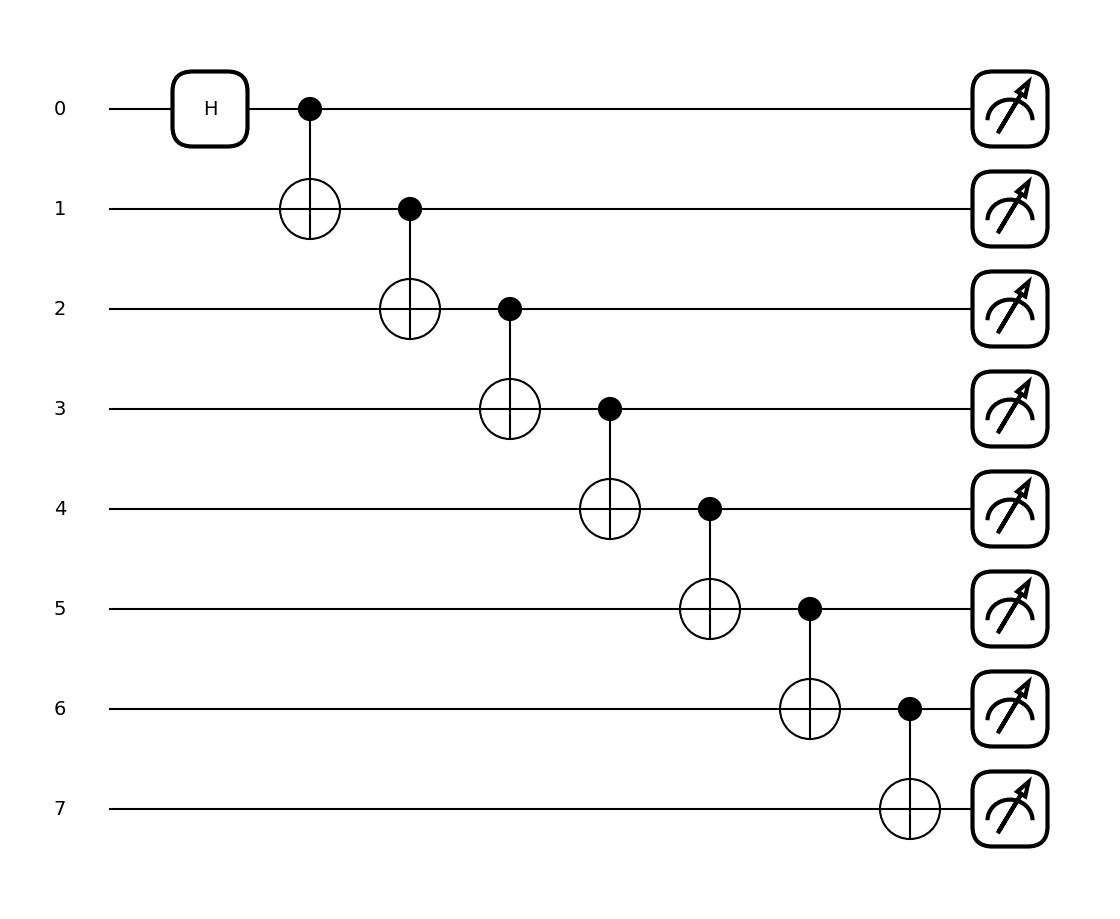

In [17]:
#Pour visualiser le circuit
qml.draw_mpl(circuit)(n_qubits)

EXERCICE

---

Nous pouvons réduire la profondeur de ce circuit en appliquant des portes en parallèles. Réduisez la profondeur du circuit et donnez la profondeur du nouveau circuit. 

In [23]:
@qml.qnode(dev)
def reduced_circuit(n_qubits):
    qml.Hadamard(wires = 0)
    for n in [2, 4, 8]:
      for i in range(n//2):
        qml.CNOT(wires = [i, n - i - 1])
    return qml.state()
#####YOUR CODE HERE##############
    return qml.state()

(<Figure size 1100x900 with 1 Axes>, <Axes: >)

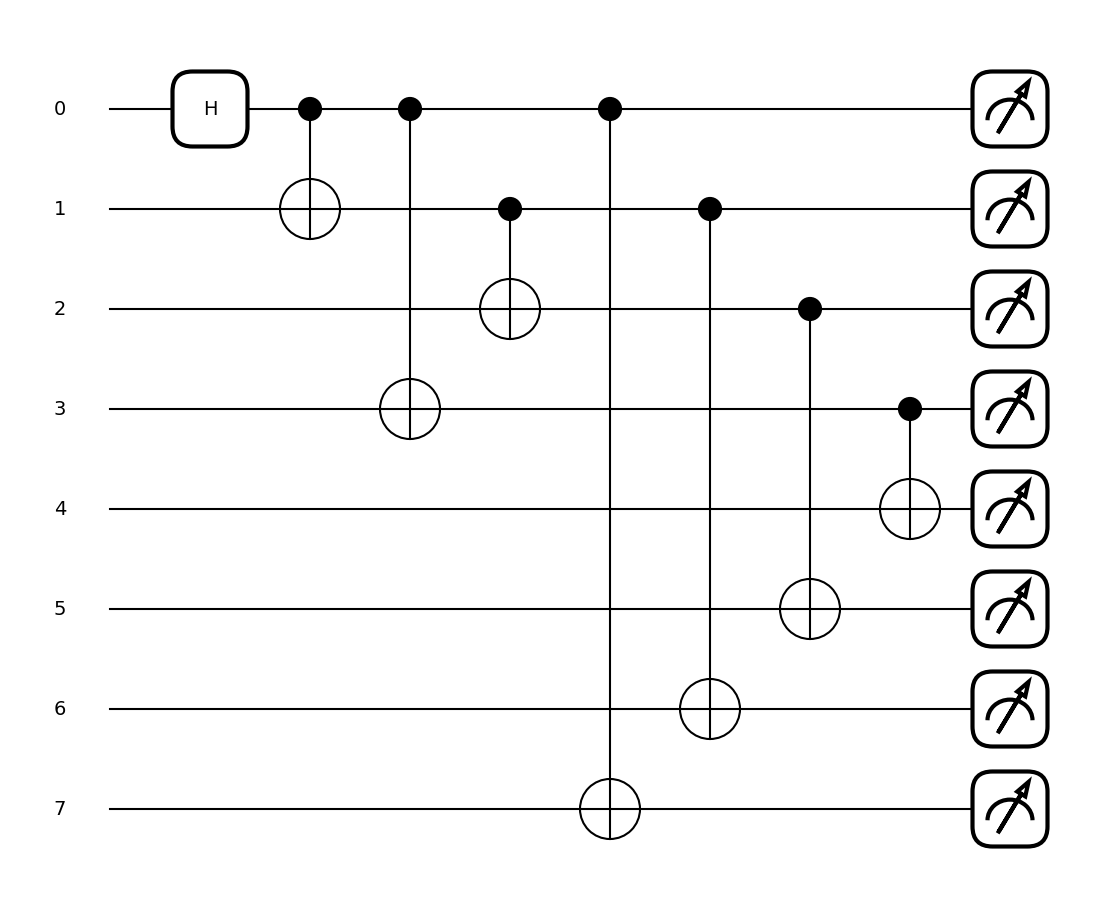

In [26]:
#Pour visualiser le circuit
qml.draw_mpl(reduced_circuit, show_all_wires=True)(n_qubits)